In [76]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [77]:
FILE_PATH = 'data/entries3.json'

all_entries = []
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries.append(entry)
len(all_entries)

107

In [78]:
control_start, exp_start = [], []
control_finish, exp_finish = [], []
starts = [control_start, exp_start]
finishes = [control_finish, exp_finish]

for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']['conditionNumber']
        starts[condition].append(entry)
    else:
        condition = entry['data'][0]['conditionNumber']
        finishes[condition].append(entry)

print(len(control_start), len(exp_start))
print(len(control_finish), len(exp_finish))


30 26
28 23


In [79]:
contol_aha, control_pleasant = [], []
for entry in control_finish:
    entry_data = entry['data']
    
    for question in range(9, 11): #(5,7) for entries 1-2
        rating = entry_data[question]['response']
        if 'Aha' in entry_data[question]['stimulus']:
            contol_aha.append(rating)
        else:
            control_pleasant.append(rating)
            
exp_aha, exp_pleasant = [], []         
for entry in exp_finish:
    entry_data = entry['data']
    for question in range(10, 12): #(6,8) for entries 1-2
        rating = entry_data[question]['response']
        if 'Aha' in entry_data[question]['stimulus']:
            exp_aha.append(rating)
        else:
            exp_pleasant.append(rating)
            
def clean(values):
    return [int(value) for value in values]
            
contol_aha = clean(contol_aha)
control_pleasant = clean(control_pleasant)
exp_aha, exp_pleasant = clean(exp_aha), clean(exp_pleasant)
            
print(len(contol_aha), len(control_pleasant))
print(len(exp_aha), len(exp_pleasant))

28 28
23 23


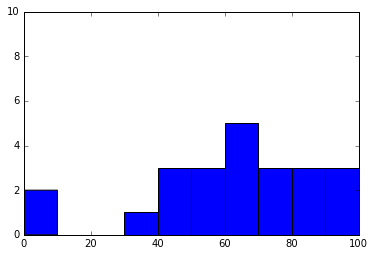

In [80]:
plt.hist(exp_pleasant)
axes = plt.gca()
axes.set_ylim([0,10])
plt.show()

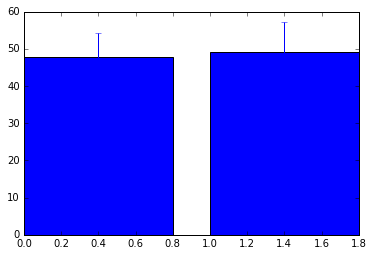

In [81]:
control_aha_mean = np.mean(contol_aha)
control_aha_error = stats.sem(contol_aha)
exp_aha_mean = np.mean(exp_aha)
exp_aha_error = stats.sem(exp_aha)

plt.bar(
    np.arange(2),
    [control_aha_mean, exp_aha_mean],
    yerr=[control_aha_error, exp_aha_error]
)
plt.show()

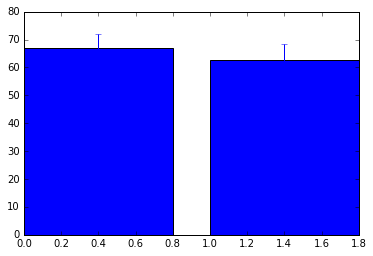

In [82]:
control_pleasant_mean = np.mean(control_pleasant)
control_pleasant_error = stats.sem(control_pleasant)
exp_pleasant_mean = np.mean(exp_pleasant)
exp_pleasant_error = stats.sem(exp_pleasant)

plt.bar(
    np.arange(2),
    [control_pleasant_mean, exp_pleasant_mean],
    yerr=[control_pleasant_error, exp_pleasant_error]
)
plt.show()